Examples per thread: 35
Thread 0 spawnedThread 1 spawned

Thread 2 spawnedThread 3 spawned

Thread 0 finishedThread 1 finishedThread 3 finished
Thread 2 finished


Finished in 0:00:00.018270


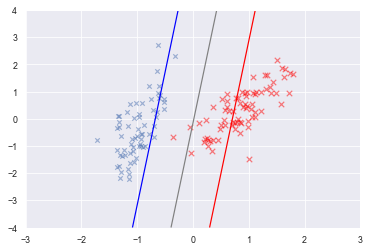

In [1]:
## Dataset tiny
import matplotlib.pyplot as plt
from DataLoader import *
from LinearSVM import *
from SGD import *
from LinearSVMParallel import *
dataloader = DataLoader()

# Tiny
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()
lr = 0.1
C = 0.001
svm = LinearSVMParallel(lr=lr, C=C, tqdm_toggle=True, show_plot=True)
svm.fit(xtrain, ytrain)
